## Gender Pay Gap - Government Equalities Office

### Data
Employers with 250 or more employees must publish and report specific figures about their gender pay gap.

Source: [Government Equalities Office](https://data.gov.uk/dataset/54219db1-dd98-49d9-a383-a5978bb0aeb9/gender-pay-gap).

Overview: https://www.gov.uk/guidance/gender-pay-gap-reporting-make-your-calculations

Guide to calculations [here](https://www.gov.uk/guidance/gender-pay-gap-reporting-make-your-calculations).

About the [written publication](https://www.gov.uk/guidance/gender-pay-gap-reporting-what-employers-must-publish).

### Exploratory Data Analysis
1. General Info
2. Missing Values
3. Ordinal Proportions
4. Correlation Matrix
5. Diff Hourly Wage
6. Bonuses.
7. Quartiles (Pending)
8. Reports PDF

In [105]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("data/gpg-equalities-office.csv")

## 1 General Info

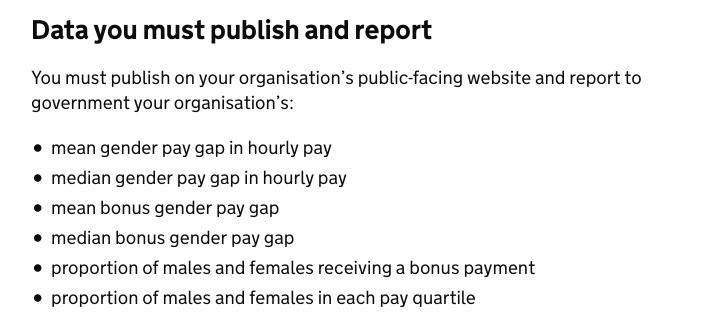

In [10]:
rows = df.shape[0]
cols = df.shape[1]
print(f"Rows: {rows}")
print(f"Cols: {cols}")

Rows: 10563
Cols: 25


### Columns

1.   **EmployerName**
2.   **Address**
3.   **CompanyNumber**
4.   **SicCodes** Standard Industry Classification, four-digit code
5.   **DiffMeanHourlyPercent**
6.   **DiffMedianHourlyPercent**
7.   **DiffMeanBonusPercent**
8.   **DiffMedianBonusPercent**
9.   **MaleBonusPercent**
10.  **FemaleBonusPercent**
11.  **MaleLowerQuartile**
12.  **FemaleLowerQuartile**
13.  **MaleLowerMiddleQuartile**
13.  **FemaleLowerMiddleQuartile**
14.  **MaleUpperMiddleQuartile**
15.  **FemaleUpperMiddleQuartile**
14.  **MaleTopQuartile**
17.  **FemaleTopQuartile**
18.  **CompanyLinkToGPGInfo**
19.  **ResponsiblePerson**
20.  **EmployerSize** - 7 strates
21. **CurrentName**
22.  **SubmittedAfterTheDeadline**
23.  **DueDate**
24.  **DateSubmitted**         

In [11]:
df.head()

,EmployerName,Address,CompanyNumber,SicCodes,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,...,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile,CompanyLinkToGPGInfo,ResponsiblePerson,EmployerSize,CurrentName,SubmittedAfterTheDeadline,DueDate,DateSubmitted
0,"""Bryanston School"",Incorporated","Bryanston House,\r\nBlandford,\r\nDorset,\r\nD...",00226143,85310,18.0,28.2,0.0,0.0,0.0,0.0,...,50.8,51.5,48.5,https://www.bryanston.co.uk/employment,Nick McRobb (Bursar and Clerk to the Governors),500 to 999,BRYANSTON SCHOOL INCORPORATED,False,05/04/2018 00:00:00,27/03/2018 11:42:49
1,"""RED BAND"" CHEMICAL COMPANY, LIMITED","19 Smith's Place,\r\nLeith Walk,\r\nEdinburgh,...",SC016876,47730,2.3,-2.7,15.0,37.5,15.6,66.7,...,89.7,18.1,81.9,NaN,Philip Galt (Managing Director),250 to 499,"""RED BAND"" CHEMICAL COMPANY, LIMITED",False,05/04/2018 00:00:00,28/03/2018 16:44:25
2,118 LIMITED,"3 Alexandra Gate Ffordd Pengam,\r\nGround Floo...",03951948,61900,1.7,2.8,13.1,13.6,70.0,57.0,...,50.0,58.0,42.0,NaN,"Emma Crowe (VP, Human Resources)",500 to 999,118 LIMITED,False,05/04/2018 00:00:00,27/03/2018 19:10:41
3,123 EMPLOYEES LTD,"34 Roundhay Road,\r\nLeeds,\r\nEngland,\r\nLS7...",10530651,78300,41.0,36.0,-69.8,-157.2,50.0,73.5,...,89.0,23.0,77.0,NaN,Chloe Lines (Financial Controller),250 to 499,123 EMPLOYEES LTD,True,05/04/2018 00:00:00,04/05/2018 11:24:06
4,1610 LIMITED,"Hestercombe House,\r\nCheddon Fitzpaine,\r\nTa...",06727055,93110,-22.0,-34.0,-47.0,-67.0,25.0,75.0,...,70.0,24.0,76.0,https://www.1610.org.uk/gender-pay-gap/,Tim Nightingale (CEO),250 to 499,1610 LIMITED,True,05/04/2018 00:00:00,12/04/2018 17:03:26


In [12]:
df.describe()

,DiffMeanHourlyPercent,DiffMedianHourlyPercent,DiffMeanBonusPercent,DiffMedianBonusPercent,MaleBonusPercent,FemaleBonusPercent,MaleLowerQuartile,FemaleLowerQuartile,MaleLowerMiddleQuartile,FemaleLowerMiddleQuartile,MaleUpperMiddleQuartile,FemaleUpperMiddleQuartile,MaleTopQuartile,FemaleTopQuartile
count,10563.000000,10563.000000,10543.000000,10543.000000,10563.000000,10563.000000,10563.00000,10563.00000,10563.000000,10563.000000,10563.000000,10563.000000,10563.000000,10563.000000
mean,14.344694,11.796753,7.669582,-21.741810,35.392701,33.927966,46.32913,53.67087,50.521452,49.478548,54.866619,45.133381,60.808965,39.191035
std,14.921019,15.842508,833.610386,1399.967462,36.328688,36.013289,24.12809,24.12809,26.089730,26.089730,26.218989,26.218989,24.400626,24.400626
min,-400.000000,-196.500000,-82000.000000,-120695.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,0.700000,0.000000,0.000000,0.800000,0.300000,27.00000,35.70000,29.500000,27.650000,34.000000,21.500000,41.500000,17.200000
50%,13.400000,9.200000,22.000000,5.000000,19.400000,17.200000,44.30000,55.70000,48.300000,51.700000,54.000000,46.000000,62.700000,37.300000
75%,22.900000,21.000000,53.000000,38.000000,73.200000,70.000000,64.30000,73.00000,72.350000,70.500000,78.500000,66.000000,82.800000,58.500000
max,159.000000,121.200000,3848.200000,3848.200000,100.000000,100.000000,100.00000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


## 2 Missing values

#### Percentage of presence

In [13]:
perc_of_presence = (df.notnull().sum() / rows) * 100
perc_of_presence

EmployerName                 100.000000
Address                       97.510177
CompanyNumber                 87.124870
SicCodes                      94.632207
DiffMeanHourlyPercent        100.000000
DiffMedianHourlyPercent      100.000000
DiffMeanBonusPercent          99.810660
DiffMedianBonusPercent        99.810660
MaleBonusPercent             100.000000
FemaleBonusPercent           100.000000
MaleLowerQuartile            100.000000
FemaleLowerQuartile          100.000000
MaleLowerMiddleQuartile      100.000000
FemaleLowerMiddleQuartile    100.000000
MaleUpperMiddleQuartile      100.000000
FemaleUpperMiddleQuartile    100.000000
MaleTopQuartile              100.000000
FemaleTopQuartile            100.000000
CompanyLinkToGPGInfo          73.823724
ResponsiblePerson             84.114361
EmployerSize                 100.000000
CurrentName                  100.000000
SubmittedAfterTheDeadline    100.000000
DueDate                      100.000000
DateSubmitted                100.000000


In [14]:
not_null_cols = df.columns[df.notnull().all()]
list(not_null_cols)

['EmployerName',
 'DiffMeanHourlyPercent',
 'DiffMedianHourlyPercent',
 'MaleBonusPercent',
 'FemaleBonusPercent',
 'MaleLowerQuartile',
 'FemaleLowerQuartile',
 'MaleLowerMiddleQuartile',
 'FemaleLowerMiddleQuartile',
 'MaleUpperMiddleQuartile',
 'FemaleUpperMiddleQuartile',
 'MaleTopQuartile',
 'FemaleTopQuartile',
 'EmployerSize',
 'CurrentName',
 'SubmittedAfterTheDeadline',
 'DueDate',
 'DateSubmitted']

#### Columns with empty values

In [15]:
cols_with_null = df.columns[df.isnull().any()]
list(cols_with_null)

['Address',
 'CompanyNumber',
 'SicCodes',
 'DiffMeanBonusPercent',
 'DiffMedianBonusPercent',
 'CompanyLinkToGPGInfo',
 'ResponsiblePerson']

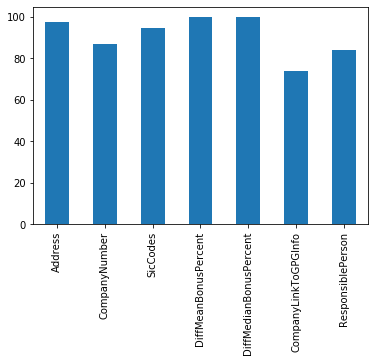

In [16]:
perc_of_presence[list(cols_with_null)].plot(x=cols_with_null, kind='bar')

## 3 Ordinal proportions

#### Company Size

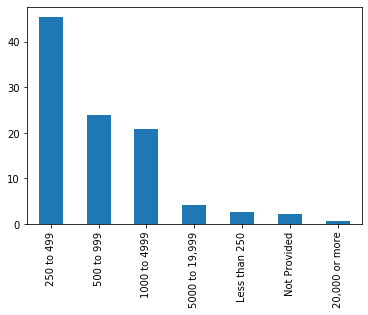

In [17]:
perc_company_size = (df['EmployerSize'].value_counts() / rows) * 100
perc_company_size.plot(kind='bar')

#### Late submission

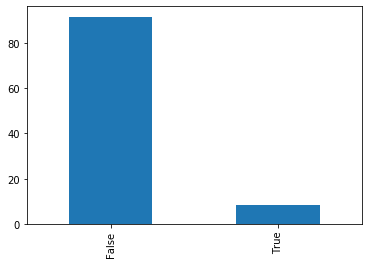

In [18]:
((df['SubmittedAfterTheDeadline'].value_counts() / rows) * 100).plot(kind='bar')

## 4 Correlations

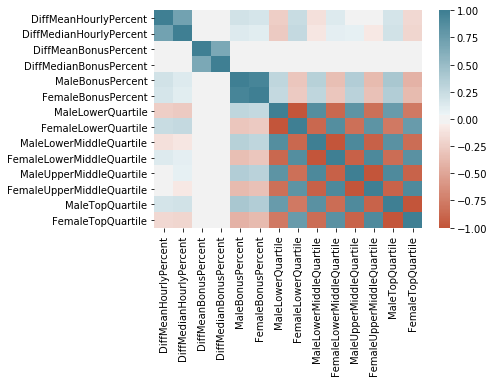

In [19]:
corr_mat = df[[
        'DiffMeanHourlyPercent', 'DiffMedianHourlyPercent',
        'DiffMeanBonusPercent', 'DiffMedianBonusPercent',
        'MaleBonusPercent', 'FemaleBonusPercent',
        'MaleLowerQuartile', 'FemaleLowerQuartile',
        'MaleLowerMiddleQuartile', 'FemaleLowerMiddleQuartile',
        'MaleUpperMiddleQuartile', 'FemaleUpperMiddleQuartile',
        'MaleTopQuartile', 'FemaleTopQuartile',
    ]].corr()
sns.heatmap(corr_mat, cmap=sns.diverging_palette(20, 220, n=200))

### **5 Diff Hourly Percent**

The **mean** hourly rate is the average hourly wage across the entire organisation so the mean gender pay gap is a measure of the difference between women’s mean hourly wage and men’s mean hourly wage.

The **median** hourly rate is calculated by ranking all employees from the highest paid to the lowest paid, and taking the hourly wage of the person in the middle; so the median gender pay gap is the difference between women’s median hourly wage (the middle paid woman) and men’s median hourly wage (the middle paid man).

In [20]:
print(df['DiffMeanHourlyPercent'].describe())
print(df['DiffMedianHourlyPercent'].describe())

count    10563.000000
mean        14.344694
std         14.921019
min       -400.000000
25%          5.000000
50%         13.400000
75%         22.900000
max        159.000000
Name: DiffMeanHourlyPercent, dtype: float64
count    10563.000000
mean        11.796753
std         15.842508
min       -196.500000
25%          0.700000
50%          9.200000
75%         21.000000
max        121.200000
Name: DiffMedianHourlyPercent, dtype: float64


In [21]:
lower_lim = -100
upper_lim =  100
# ax.set_ylim(lower_lim, upper_lim)
# ax.set_xlim(lower_lim, upper_lim)

ignored_means   = df.loc[df['DiffMeanHourlyPercent'] <= lower_lim]
ignored_medians = df.loc[df['DiffMedianHourlyPercent'] <= lower_lim]
ignored_indexes = list(set((list(ignored_means.index) + list(ignored_medians.index))))

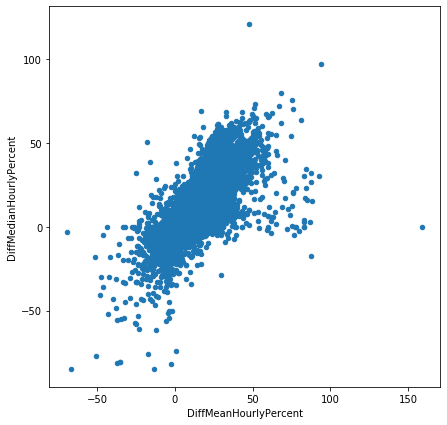

In [23]:
diff_mean_vs_median = df[['DiffMeanHourlyPercent', 'DiffMedianHourlyPercent']]
diff_mean_vs_median.drop(ignored_indexes, inplace=True)
diff_mean_vs_median.plot.scatter(x='DiffMeanHourlyPercent', y='DiffMedianHourlyPercent', figsize=(7,7))

       DiffMeanHourlyPercent  DiffMedianHourlyPercent
count           10558.000000             10558.000000
mean               14.425715                11.856819
std                14.167240                15.542409
min               -69.400000               -85.200000
25%                 5.000000                 0.700000
50%                13.400000                 9.300000
75%                22.900000                21.000000
max               159.000000               121.200000


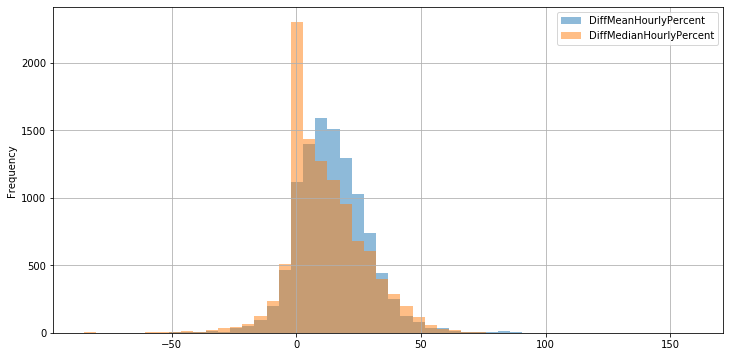

In [24]:
print(diff_mean_vs_median.describe())
diff_mean_vs_median.plot.hist(bins=50,alpha=0.5, figsize=(12,6),grid=True)

### 6 Bonus Percent

In [25]:
print(df['MaleBonusPercent'].describe())
print(df['FemaleBonusPercent'].describe())

count    10563.000000
mean        35.392701
std         36.328688
min          0.000000
25%          0.800000
50%         19.400000
75%         73.200000
max        100.000000
Name: MaleBonusPercent, dtype: float64
count    10563.000000
mean        33.927966
std         36.013289
min          0.000000
25%          0.300000
50%         17.200000
75%         70.000000
max        100.000000
Name: FemaleBonusPercent, dtype: float64


How many companies pay bonuses?

In [70]:
df['PayBonus'] = (df['MaleBonusPercent'] > 0) & (df['FemaleBonusPercent'] > 0)
df['PayBonus'].value_counts() / rows

True     0.747988
False    0.252012
Name: PayBonus, dtype: float64

7901


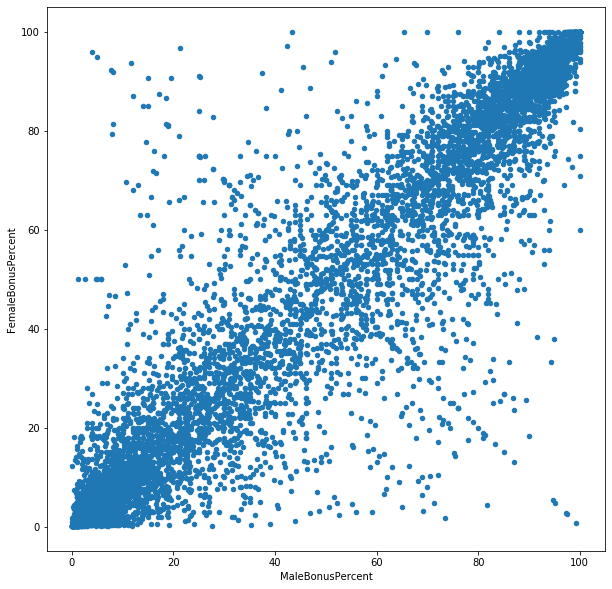

In [75]:
pay_bonus = df[df['PayBonus']]
pay_bonus.plot.scatter(x='MaleBonusPercent', y='FemaleBonusPercent', figsize=(10,10))

Slight Bias towards man.

Does the diagonal line mean people thought both percentages should sum 100?

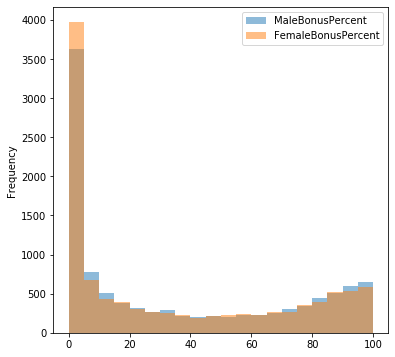

In [74]:
df[['MaleBonusPercent','FemaleBonusPercent']].plot.hist(bins=20,alpha=0.5,figsize=(6,6))

Female employees are granted with higher bonus only when it is 0-5%. In almost the rest man are slightly prefered. 

### 7 Quartiles
Pay quartiles are calculated by splitting all employees in an organisation into four even groups according to their level of pay. **Looking at the proportion of women in each quartile gives an indication of women's representation at different levels of the organisation**.

How quartiles are calculated can be found [here](https://www.gov.uk/guidance/gender-pay-gap-reporting-make-your-calculations#gender-pay-gap-quartile-figures-you-must-calculate).

In [106]:
female_quartiles = df[['FemaleLowerQuartile','FemaleLowerMiddleQuartile','FemaleUpperMiddleQuartile','FemaleTopQuartile']]
print(female_quartiles.describe())
female_quartiles.head()

       FemaleLowerQuartile  FemaleLowerMiddleQuartile  \
count          10563.00000               10563.000000   
mean              53.67087                  49.478548   
std               24.12809                  26.089730   
min                0.00000                   0.000000   
25%               35.70000                  27.650000   
50%               55.70000                  51.700000   
75%               73.00000                  70.500000   
max              100.00000                 100.000000   

       FemaleUpperMiddleQuartile  FemaleTopQuartile  
count               10563.000000       10563.000000  
mean                   45.133381          39.191035  
std                    26.218989          24.400626  
min                     0.000000           0.000000  
25%                    21.500000          17.200000  
50%                    46.000000          37.300000  
75%                    66.000000          58.500000  
max                   100.000000         100.000000  


,FemaleLowerQuartile,FemaleLowerMiddleQuartile,FemaleUpperMiddleQuartile,FemaleTopQuartile
0,75.6,49.2,50.8,48.5
1,79.7,74.6,89.7,81.9
2,49.0,47.0,50.0,42.0
3,100.0,98.0,89.0,77.0
4,44.0,48.0,70.0,76.0


### Female Representation per quartile

In [145]:
def plot_quartiles(gender, color):
    fig = plt.figure(figsize=(12,6))
    axes = fig.subplots(1, 4)
    sns.violinplot(y=f"{gender}LowerQuartile", data=df, ax=axes[0], color=color)
    sns.violinplot(y=f"{gender}LowerMiddleQuartile", data=df, ax=axes[1], color=color)
    sns.violinplot(y=f"{gender}UpperMiddleQuartile", data=df, ax=axes[2], color=color)
    sns.violinplot(y=f"{gender}TopQuartile", data=df, ax=axes[3], color=color)

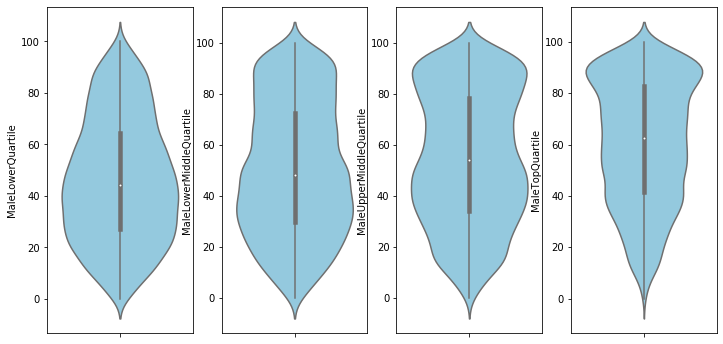

In [146]:
plot_quartiles('Male', 'skyblue')

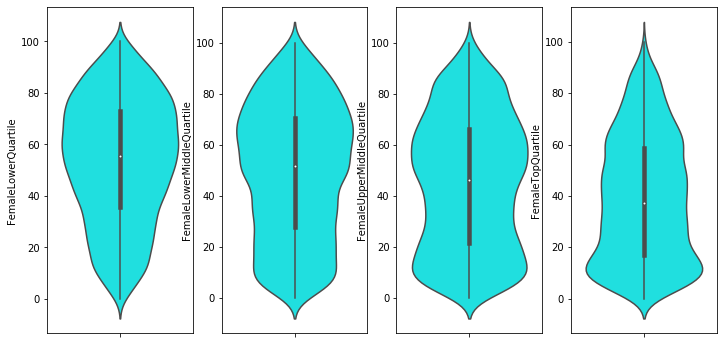

In [147]:
plot_quartiles('Female', 'cyan')

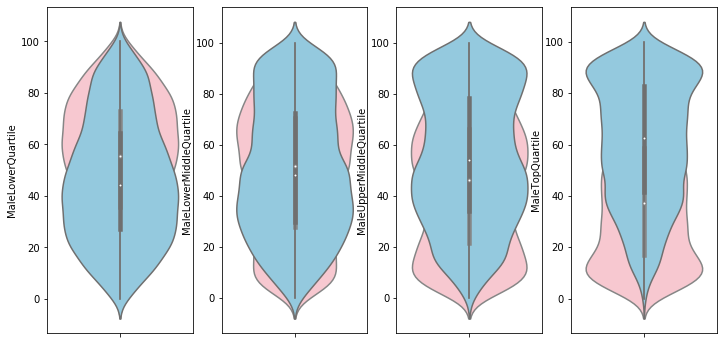

In [159]:
    fig = plt.figure(figsize=(12,6))
    axes = fig.subplots(1, 4)
    sns.violinplot(y="FemaleLowerQuartile", data=df, ax=axes[0], color='pink')
    sns.violinplot(y="MaleLowerQuartile", data=df, ax=axes[0], color='skyblue')
    sns.violinplot(y="FemaleLowerMiddleQuartile", data=df, ax=axes[1], color='pink')
    sns.violinplot(y="MaleLowerMiddleQuartile", data=df, ax=axes[1], color='skyblue')
    sns.violinplot(y="FemaleUpperMiddleQuartile", data=df, ax=axes[2], color='pink')
    sns.violinplot(y="MaleUpperMiddleQuartile", data=df, ax=axes[2], color='skyblue')
    sns.violinplot(y="FemaleTopQuartile", data=df, ax=axes[3], color='pink')
    sns.violinplot(y="MaleTopQuartile", data=df, ax=axes[3], color='skyblue')

In [ ]:
# Pending Use Split violin